# THE SPARKS FOUNDATION 
**Data Science & Business Analytics**

## Task-2: Prediction using Unsupervised ML
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

*Author* : **RAHUL KUMAR**

### 1. Importing important packages and libraries ###

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from kneed import KneeLocator
from sklearn.cluster import KMeans

### 2. Importing the given dataset and printing its values ###

In [2]:
url = 'D:\AI or Data Science Internships\The Sparks Foundaion\Task-2 (Unsupervised ML)\Iris.csv'
dataset = pd.read_csv(url)
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### 3. Exploratory Data Analysis ###

In [3]:
print("\nData size :",dataset.shape)
print("\nNumber of records :",len(dataset))
print("\nNumber of atrributes :",len(dataset.columns))
dataset.describe()


Data size : (150, 6)

Number of records : 150

Number of atrributes : 6


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


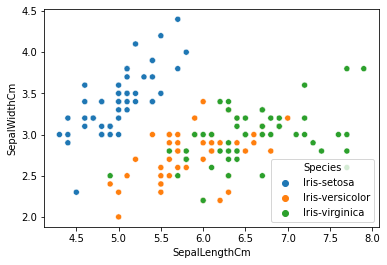

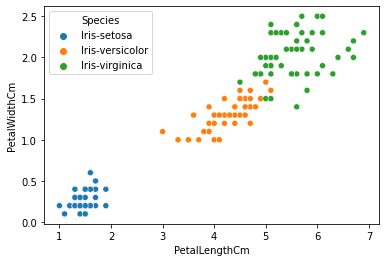

In [4]:
sns.scatterplot(x=dataset['SepalLengthCm'],y=dataset["SepalWidthCm"],hue=dataset["Species"],cmap='hsv')

plt.show()

sns.scatterplot(x=dataset['PetalLengthCm'],y=dataset["PetalWidthCm"],hue=dataset["Species"],cmap='hsv')

plt.show()

### 4. K-Means Clustering (using Elbow Method) ###

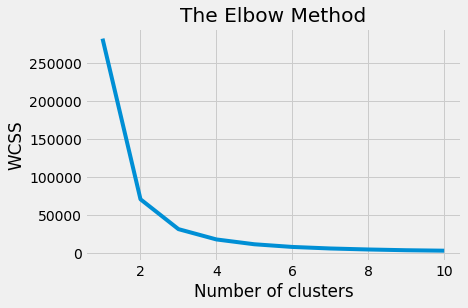

In [5]:
# Finding the optimum number of clusters for k-means classification algorithm

x = dataset.iloc[:, [0, 1, 2, 3]].values

wcss = [] # Within cluster sum of squares (WCSS)

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

The sharp point of bend or a point( looking like an elbow joint ) of the plot like an arm, will be considered as the best/optimal value of K. This is when the 'within cluster sum of squares (WCSS)' doesn't decrease significantly with every iteration. 

**According to the graph, we'll choose the point k (or number of clusters) to be 3.**

In [7]:
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

3

**We can also identify the elbow point programmatically using the 'kneed' python library.**

In [8]:
# The lowest SSE (Error Sum of Squares) or WCSS value
kmeans.inertia_

2968.491432665374

In [9]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 21.5       ,   5.21428571,   3.62142857,   1.50714286],
       [111.        ,   6.65294118,   2.95294118,   5.70588235],
       [ 63.        ,   5.81333333,   2.70666667,   4.16      ],
       [142.5       ,   6.49375   ,   3.03125   ,   5.39375   ],
       [ 94.5       ,   5.7875    ,   2.7625    ,   4.2875    ],
       [ 49.        ,   5.50769231,   3.23846154,   2.67692308],
       [ 78.5       ,   6.05      ,   2.81875   ,   4.4       ],
       [  7.5       ,   4.85      ,   3.3       ,   1.43571429],
       [ 35.5       ,   5.00714286,   3.32142857,   1.42142857],
       [127.        ,   6.68666667,   2.93333333,   5.54666667]])

In [10]:
# The number of iterations required to converge
kmeans.n_iter_

5

In [11]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### 5. Cluster Visualization ###

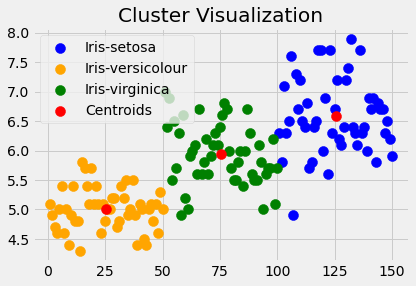

In [14]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.title('Cluster Visualization')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()